# Electricity demand forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from meteostat import Hourly

In [2]:
# Load and clean the dataset
data = pd.read_csv('data/raw_data.csv', delimiter=';')
data = data[data['Power [MW]'] != '-']
data['Power [MW]'] = data['Power [MW]'].str.replace(',', '.').astype(float)
data[['Date', 'Time']] = data['Date'].str.split(' ', expand=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y').dt.strftime("%Y-%m-%d")
data = data.reindex(columns=['Date', 'Time', 'Power [MW]'])

In [3]:
years = pd.to_datetime(data['Date'], format='%Y-%m-%d').dt.strftime("%Y").unique()
holiday_dates = []
for year in years:
    url = f"https://digidates.de/api/v1/germanpublicholidays?year={year}&region=de-be"
    response = requests.get(url)
    holidays = response.json()
    [holiday_dates.append(holiday) for holiday in holidays.keys()]

data['Holiday'] = data['Date'].isin(holiday_dates)
data.head()

,Date,Time,Power [MW],Holiday
384,2015-01-05,00:00,56.00,False
385,2015-01-05,00:15,56.00,False
386,2015-01-05,00:30,56.00,False
387,2015-01-05,00:45,56.00,False
388,2015-01-05,01:00,56.25,False


In [12]:
# start = datetime(2015, 1, 1)
# end = datetime(2024, 12, 31, 23, 59)

# weather = Hourly('10384', start, end)
# weather = weather.fetch()
# weather.to_csv('data/weather_data.csv')

weather = pd.read_csv('data/weather_data.csv')

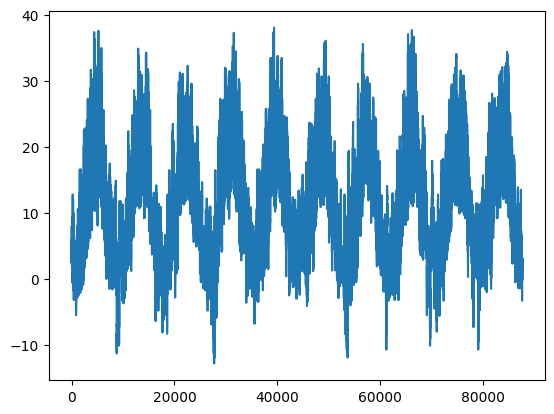

In [13]:
plt.plot(weather['temp'])